# Neural Networks for Almond Classification
#### Daniël van Zyl: u21446459
- Resilient Back propagation (RProp)

## Resilient Back Propagation
### Data pre-processing

#### Imports

In [82]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler

#### Read in data

In [83]:
data = pd.read_csv('./Almond.csv')

#### Basic Description of Data

In [84]:
data.head(1)

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA


In [85]:
#Drop Unnamed Colounm
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(1)

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA


In [86]:
data.describe()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,1946.000000,1861.000000,1799.000000,2803.000000,2803.000000,1946.000000,2803.000000,2803.000000,1004.000000,1004.000000,2803.000000,2803.000000
mean,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,62.719433,29.916529,18.940597,13782.561344,230.632076,0.118673,0.039596,0.794058,0.206616,0.041312,0.047474,14237.347610
min,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,245.966293,149.453659,97.091682,16211.500000,571.730009,0.384810,0.944579,1.357398,1.612490,0.784476,0.701673,17088.500000
50%,279.879883,170.168365,110.280136,23440.500000,707.487369,0.472718,0.970422,1.576412,1.705716,0.810120,0.733720,24589.000000
75%,330.508575,190.640427,121.392773,33451.000000,878.896530,0.577553,0.981484,1.965953,1.833339,0.838141,0.757551,34863.250000
max,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


### Plots

In [87]:
def plot_histograms(data):
    data.hist(figsize=(8, 8), bins=30)
    plt.suptitle('Feature Distributions', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_heatmap(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
        
    plt.figure(figsize=(8, 8))
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap of correlations in the data', fontsize=12)
    plt.tight_layout()
    plt.show()

def get_num_categories(data):
    plt.figure(figsize=(4, 4))
    sns.countplot(x='Type', data=data, hue='Type', palette='Set1', legend=False)
    plt.title(f'Count of Each Category', fontsize=14)
    plt.xlabel('Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Distributions

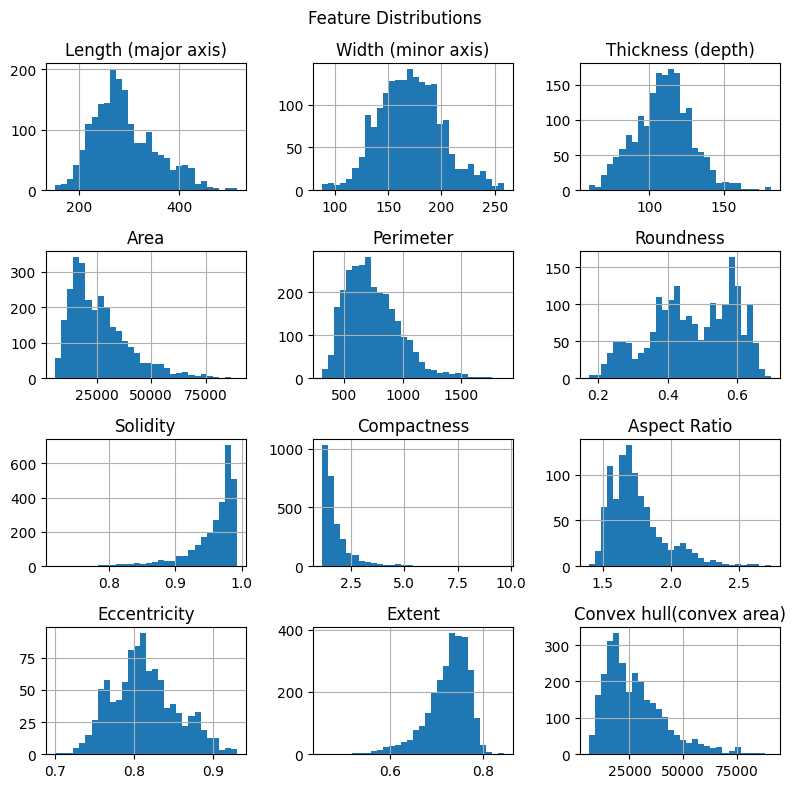

In [88]:
plot_histograms(data)

From the distrubution plots above we can see that very few attributes follow a normal distribution and therefore will have to use different techniques to handle the missing values.

#### Correlations

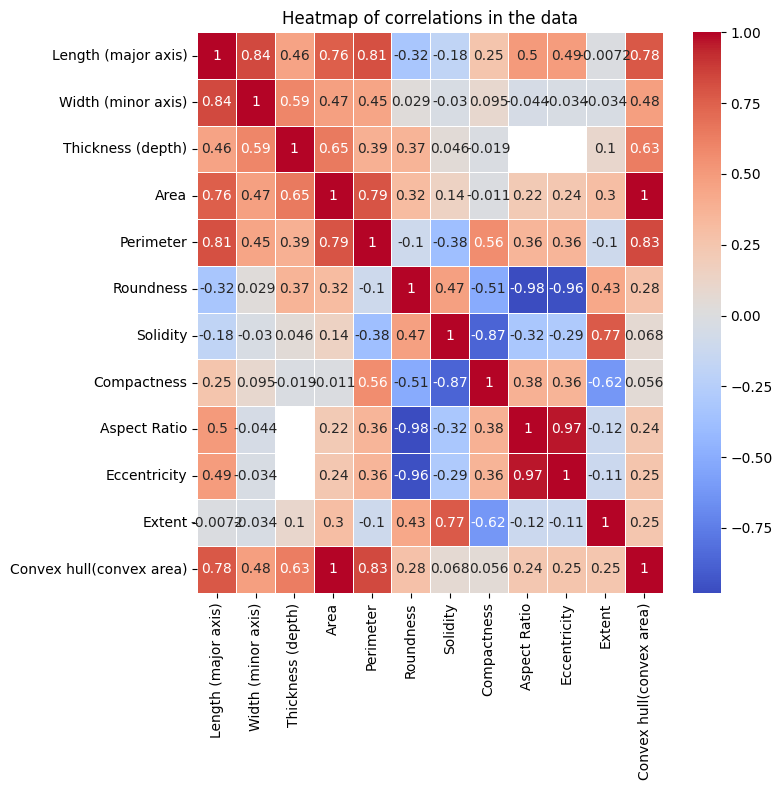

In [89]:
plot_heatmap(data)

#### Categories

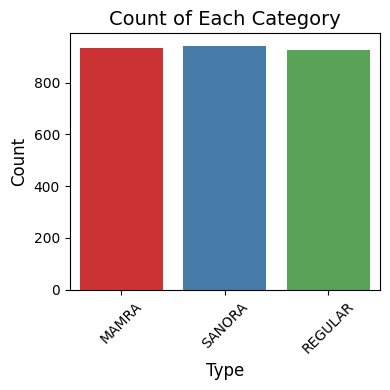

Type
SANORA     943
MAMRA      933
REGULAR    927
Name: count, dtype: int64

In [90]:
get_num_categories(data)
data['Type'].value_counts()

The number of categories is close therefore, the data set is balanced.

#### Handle Missing values

In [91]:
data.isnull().sum()

Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

In [92]:
def handle_missing(data):
    imputer = KNNImputer(n_neighbors=5)
    columns_to_impute = ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)']
    
    updated_data = data.copy()
    updated_data[columns_to_impute] = imputer.fit_transform(updated_data[columns_to_impute])
    
    updated_data['Roundness'] = 4  * updated_data['Area'] / (np.pi * updated_data['Length (major axis)'] ** 2)
    updated_data['Aspect Ratio'] = updated_data['Length (major axis)'] / updated_data['Width (minor axis)']
    updated_data['Eccentricity'] = (1 - (updated_data['Width (minor axis)'] / updated_data['Length (major axis)']) ** 2)


    return updated_data

In [93]:
data_no_missing = handle_missing(data.copy())

In [94]:
data_no_missing.isnull().sum()

Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64

#### Handle Outliers

In [95]:
def visualise_outliers(data):
    features = ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)', 
                'Area', 'Perimeter', 'Roundness', 'Solidity', 
                'Compactness', 'Aspect Ratio', 'Eccentricity', 'Extent', 'Convex hull(convex area)']
    num_features = len(features)
    cols = 4  
    rows = (num_features + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
    axes = axes.flatten() 
    
    for i, feature in enumerate(features):
        sns.boxplot(ax=axes[i], x=data[feature])
        axes[i].set_title(f'Box Plot of {feature}')
        axes[i].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

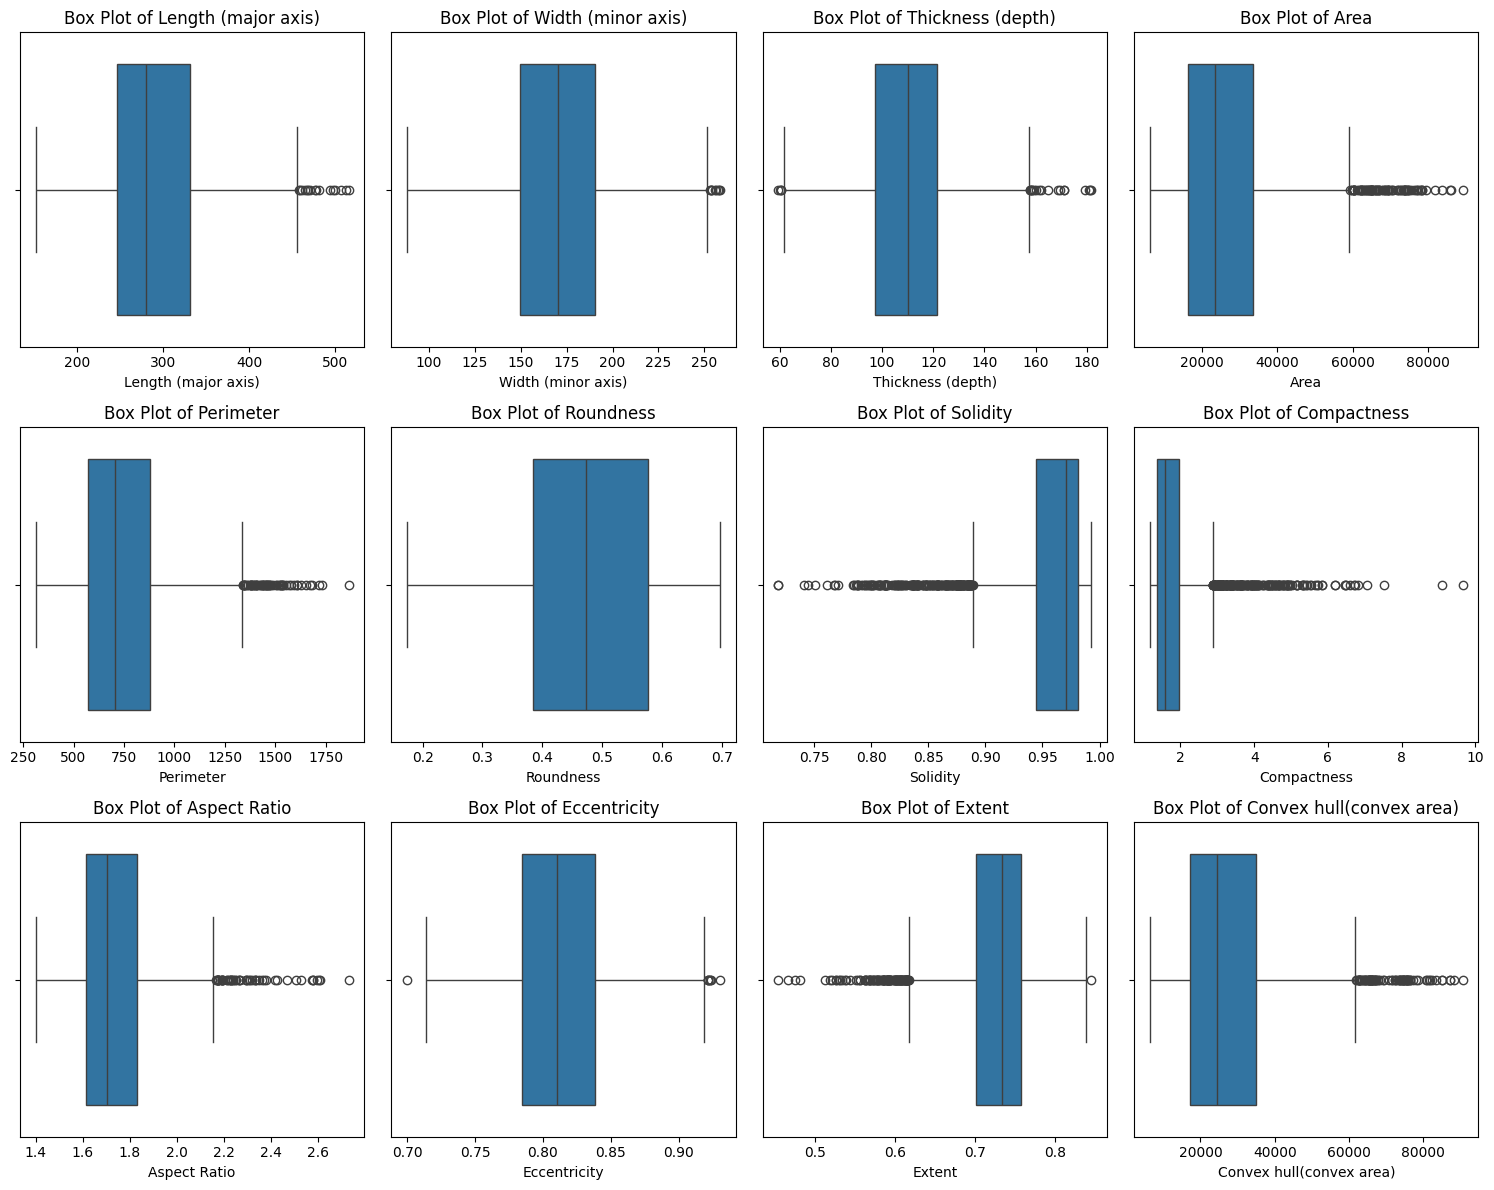

In [96]:
visualise_outliers(data)

In [97]:
def handle_outliers(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    for column in numeric_data.columns:
        skewness = numeric_data[column].skew()
        Q1 = numeric_data[column].quantile(0.25)
        Q3 = numeric_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (numeric_data[column] < lower_bound) | (numeric_data[column] > upper_bound)
        
        if abs(skewness) > 0.5:
            median = numeric_data[column].median()
            numeric_data.loc[outliers, column] = median
        else:
            mean = data[column].mean()
            numeric_data.loc[outliers, column] = mean

    numeric_data['Type'] = data['Type']
    return numeric_data


In [98]:
no_outliers = handle_outliers(data.copy())

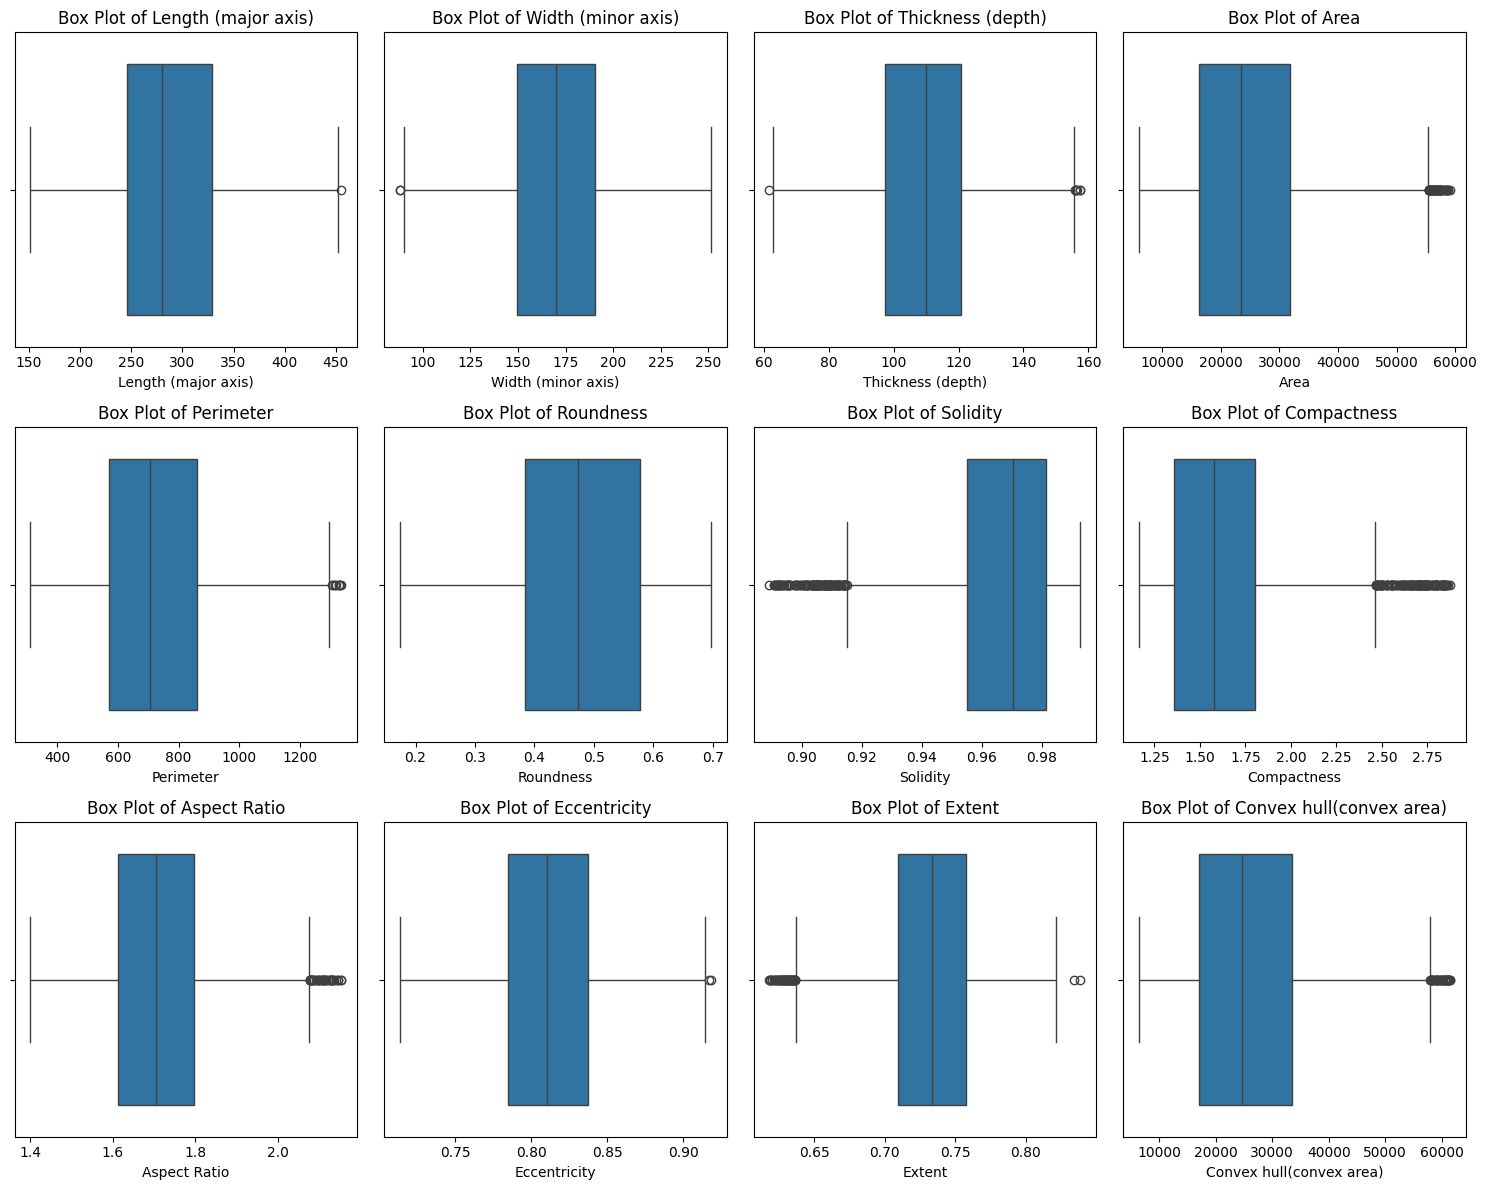

In [99]:
visualise_outliers(no_outliers)

#### Clean Data

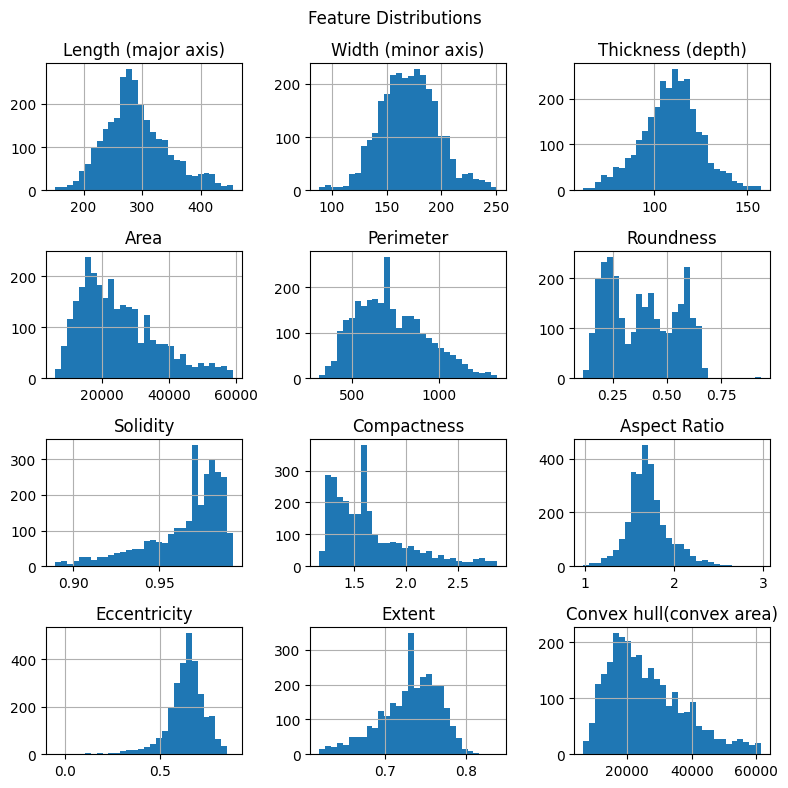

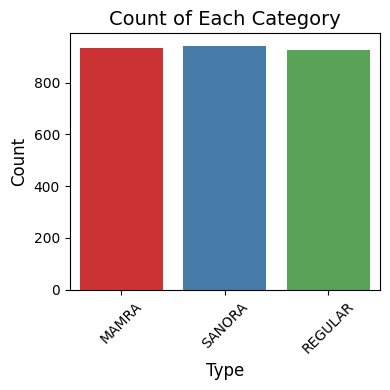

Type
SANORA     943
MAMRA      933
REGULAR    927
Name: count, dtype: int64

In [100]:
data_cleaned = handle_outliers(data.copy())
data_cleaned = handle_missing(data_cleaned.copy())

plot_histograms(data_cleaned)
get_num_categories(data_cleaned)
data_cleaned['Type'].value_counts()

In [101]:
data_cleaned.isnull().sum()

Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64

In [102]:
data_cleaned.describe()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000,2803.000000
mean,290.414667,170.613525,109.051255,25092.306993,727.050674,0.387219,0.965126,1.639954,1.710296,0.638005,0.730551,26211.005708
std,54.051222,26.465483,15.821893,11418.218408,202.168168,0.156825,0.022191,0.368821,0.239341,0.103639,0.036988,11775.161268
min,151.335266,88.050529,61.589066,6037.000000,311.563489,0.112487,0.889311,1.164469,0.975345,-0.051195,0.618295,6355.000000
25%,255.005066,152.447192,99.374183,16211.500000,571.730009,0.239763,0.954939,1.357398,1.562131,0.590206,0.709183,17088.500000
50%,284.225861,170.482086,109.705378,23440.500000,707.487369,0.381137,0.970422,1.576412,1.687237,0.648725,0.733720,24589.000000
75%,320.930542,187.916994,118.846516,31870.500000,862.432063,0.536187,0.981484,1.799806,1.813709,0.696006,0.757518,33470.500000
max,455.570923,251.321655,157.605255,59072.000000,1337.276253,0.935513,0.992889,2.874083,2.981810,0.887529,0.838823,61502.500000


#### Normalise Input

In [103]:
def normalise(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    type_column = data['Type']
    numerical_columns = data.drop(columns=['Type'])
    data_scaled = scaler.fit_transform(numerical_columns)

    data_scaled = pd.DataFrame(data_scaled, columns=numerical_columns.columns)
    
    data_scaled['Type'] = type_column
    return data_scaled

In [104]:
data_scaled = normalise(data_cleaned.copy())
data_scaled.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0.461868,0.856796,0.689155,0.312661,0.323921,0.274139,0.811683,0.171850,0.152029,0.470012,0.285214,0.306134,MAMRA
1,0.574596,0.895061,0.693742,0.320562,0.360161,0.198377,0.656442,0.255833,0.207993,0.570572,0.172578,0.321148,MAMRA
2,0.713794,0.865849,0.668715,0.308278,0.326972,0.118370,0.752660,0.189109,0.314421,0.706906,0.296221,0.304438,MAMRA
3,0.724218,0.886333,0.669988,0.311898,0.340899,0.116186,0.735687,0.220231,0.309709,0.702002,0.304112,0.308808,MAMRA
4,0.443880,0.870333,0.475590,0.245706,0.305426,0.223007,0.599920,0.271948,0.134050,0.431789,0.437609,0.248171,MAMRA


#### Encode Almond Types

In [105]:
type_encodings = {
    'REGULAR': 0,
    'MAMRA': 1,
    'SANORA': 2
}
final_data = data_scaled.copy()
final_data['Type'] = data_scaled['Type'].map(type_encodings)

final_data['Type'].value_counts()

Type
2    943
1    933
0    927
Name: count, dtype: int64

In [106]:
final_data.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0.461868,0.856796,0.689155,0.312661,0.323921,0.274139,0.811683,0.171850,0.152029,0.470012,0.285214,0.306134,1
1,0.574596,0.895061,0.693742,0.320562,0.360161,0.198377,0.656442,0.255833,0.207993,0.570572,0.172578,0.321148,1
2,0.713794,0.865849,0.668715,0.308278,0.326972,0.118370,0.752660,0.189109,0.314421,0.706906,0.296221,0.304438,1
3,0.724218,0.886333,0.669988,0.311898,0.340899,0.116186,0.735687,0.220231,0.309709,0.702002,0.304112,0.308808,1
4,0.443880,0.870333,0.475590,0.245706,0.305426,0.223007,0.599920,0.271948,0.134050,0.431789,0.437609,0.248171,1


### Neural Network

#### Imports & Setup

In [107]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split

In [133]:
class NNModel(nn.Module):
    def __init__(self, seed, in_features=12, num_hidden_layers=4, hidden_neurons=12, out_categories=3):
        super(NNModel, self).__init__()
        np.random.seed(seed)
        torch.manual_seed(seed)

        self.epochs = 100
        self.losses = []
        self.train_accuracy = []
        self.test_accuracy = []
        self.predictions = []
        self.criterion = nn.CrossEntropyLoss()
        self.optimiser = any
        
        self.num_hidden = num_hidden_layers
        layers = []
        
        layers.append(nn.Linear(in_features, hidden_neurons))
        layers.append(nn.ReLU())
        
        for _ in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(nn.ReLU())
            
        layers.append(nn.Linear(hidden_neurons, out_categories))
        
        self.layers = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.layers(x)

    def train(self, train, train_exp, epochs=500, lr=0.001, optim="adam"):
        # print(self.parameters)
        self.optimiser = torch.optim.Adam(self.parameters(), lr=lr)
        if(optim != "Adam"):
            self.optimiser = torch.optim.Rprop(self.parameters(), lr=lr)
        
        self.epochs = epochs
        for ep in range(self.epochs):
            outcomes = self.forward(train)
            loss = self.criterion(outcomes, train_exp)
            
            with torch.no_grad():
                predicted_classes = torch.argmax(outcomes, dim=1)
                self.losses.append(loss.detach().numpy())
                self.train_accuracy.append(np.sum(predicted_classes.numpy() == train_exp.numpy()) / predicted_classes.shape[0])
            
            self.optimiser.zero_grad()
            loss.backward()
            self.optimiser.step()

    def show_training_results(self):
        for ep in range(self.epochs):
            if ep % 100 == 0:
                print(f'Epoch: {ep} | Loss: {self.losses[ep]} | Accuracy: {self.train_accuracy[ep]}')
                
        plt.plot(range(self.epochs), self.losses)
        plt.ylabel("loss/error")
        plt.xlabel("Epoch")

    def testing_nn_accuracy(self, test, test_expected):
        # self.eval()
        outcomes = self.forward(test)
        predicted_classes = torch.argmax(outcomes, dim=1)
        
        return np.sum(predicted_classes.numpy() == test_expected.numpy()) / predicted_classes.shape[0]
        
        

### Main

Epoch: 0 | Loss: 1.0975209474563599 | Accuracy: 0.37778768956289027
Epoch: 100 | Loss: 0.6801080107688904 | Accuracy: 0.6989295272078502
Epoch: 200 | Loss: 0.5655526518821716 | Accuracy: 0.7528991971454059
Epoch: 300 | Loss: 0.5204896330833435 | Accuracy: 0.7729705619982159
Epoch: 400 | Loss: 0.4916815757751465 | Accuracy: 0.7876895628902766
Epoch: 500 | Loss: 0.470696359872818 | Accuracy: 0.796164139161463
Epoch: 600 | Loss: 0.4565306305885315 | Accuracy: 0.8037466547725245
Epoch: 700 | Loss: 0.444468230009079 | Accuracy: 0.812221231043711
Epoch: 800 | Loss: 0.4345865845680237 | Accuracy: 0.8193577163247101
Epoch: 900 | Loss: 0.4267573654651642 | Accuracy: 0.8202497769848349
Epoch: 1000 | Loss: 0.4205090403556824 | Accuracy: 0.8282783229259589
Epoch: 1100 | Loss: 0.4144432842731476 | Accuracy: 0.8309545049063336
Epoch: 1200 | Loss: 0.4096696078777313 | Accuracy: 0.8296164139161463
Epoch: 1300 | Loss: 0.40494948625564575 | Accuracy: 0.8331846565566459
Epoch: 1400 | Loss: 0.400090008974

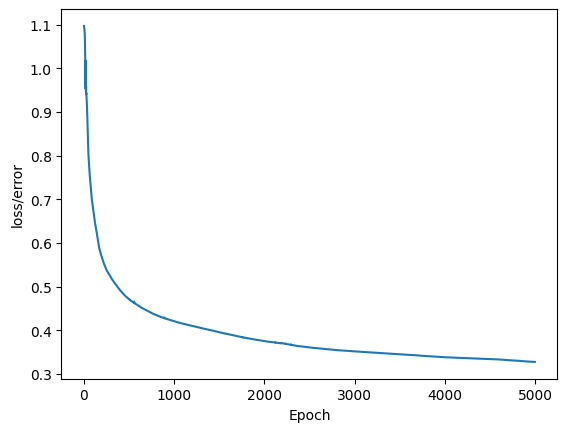

In [153]:
#Split data
X = final_data.drop('Type', axis=1)
y = final_data['Type']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21446459)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#Train
classifier = NNModel(seed=21446459, num_hidden_layers=2, hidden_neurons=52)
classifier.train(X_train, y_train, epochs=2000)
classifier.show_training_results()

#Test
accuracy = classifier.testing_nn_accuracy(X_test, y_test)
print(f'NN Testing Accuracy: {accuracy}')

#### Train